In [28]:
import pandas as pd
import matplotlib.pyplot as plt

path = "../data/2_cleaned/water_intake_cleaned.csv"
df = pd.read_csv(path)

In [29]:
df_hot = df[df["Weather"] == "Hot"]
df_hot["Hydration Level"].value_counts()

Hydration Level
Good    9976
Poor     105
Name: count, dtype: int64

In [30]:
df_poor = df[df["Hydration Level"] == "Poor"]
df_poor["Weather"].value_counts()

Weather
Cold      3854
Normal    2126
Hot        105
Name: count, dtype: int64

In [31]:
weight_bins = [0, 60, 80, 100, float("inf")]
weight_labels = ["<60 kg", "60–80 kg", "80–100 kg", ">100 kg"]

df["Weight Group"] = pd.cut(
    df["Weight"],
    bins=weight_bins,
    labels=weight_labels
)

df_good = df[df["Hydration Level"] == "Good"]
df_bad = df[df["Hydration Level"] == "Poor"]


In [ ]:
def hydration_intake_grids(
    df,
    weight_col="Weight",
    weather_col="Weather",
    intake_col="Daily Water Intake",
    weight_bins=(0, 60, 80, 100, float("inf")),
    weight_labels=("<60 kg", "60–80 kg", "80–100 kg", ">100 kg"),
    weather_order=("Cold", "Normal", "Hot")
):
    # Create weight groups (non-destructive copy)
    df = df.copy()
    df["Weight Group"] = pd.cut(
        df[weight_col],
        bins=weight_bins,
        labels=weight_labels
    )

    # Mean grid
    grid_mean = (
        df.groupby(["Weight Group", weather_col])[intake_col]
          .agg(["mean"])
          .round(2)
          .unstack(level=weather_col)
          .reindex(columns=weather_order, level=1)
    )

    # Median grid
    grid_median = (
        df.groupby(["Weight Group", weather_col])[intake_col]
          .agg(["median"])
          .round(2)
          .unstack(level=weather_col)
          .reindex(columns=weather_order, level=1)
    )

    return grid_mean, grid_median
bad_mean, _ = hydration_intake_grids(df_bad)
good_mean, _ = hydration_intake_grids(df_good)

mean_diff = (good_mean - bad_mean).round(2)
print(mean_diff)

average_gap = mean_diff.stack().mean().round(2)

print("Average hydration gap (L/day):", average_gap)


C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_24504\4062218345.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Weight Group", weather_col])[intake_col]
C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_24504\4062218345.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Weight Group", weather_col])[intake_col]
C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_24504\4062218345.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

mean             
Weather       Cold Normal   Hot
Weight Group                   
<60 kg        0.39   0.58  1.07
60–80 kg      0.80   0.88  1.14
80–100 kg     0.88   0.91  1.14
>100 kg       0.85   0.88  1.13

C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_24504\2551479038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Weight Group", "Hydration Level"])


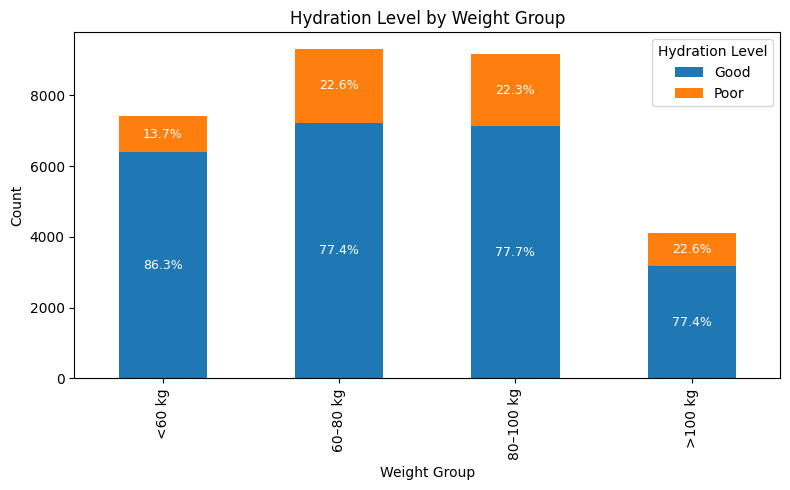

In [33]:
counts = (
    df.groupby(["Weight Group", "Hydration Level"])
      .size()
      .unstack(fill_value=0)
)

ax = counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5)
)

plt.xlabel("Weight Group")
plt.ylabel("Count")
plt.title("Hydration Level by Weight Group")
plt.legend(title="Hydration Level")

totals = counts.sum(axis=1)

for container, level in zip(ax.containers, counts.columns):
    for rect, total in zip(container, totals):
        height = rect.get_height()
        if height > 0:
            percentage = height / total * 100
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                f"{percentage:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="white"
            )

plt.tight_layout()
plt.show()